In [1]:
import re
import nltk
import os
import json
from datetime import datetime, date
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from collections import Counter, defaultdict

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarahtam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
def byDate(tup):
    dateFormat = '%Y-%m-%d' # ex. 2020-04-24
    return datetime.strptime(tup[0], dateFormat)

In [23]:
weeklySentis = {}

dateFormat = '%Y-%m-%d' # ex. 2020-Apr-24
for file in os.listdir("covidera_cleaned_sent/"):
    print(file)
    month, day = file.split("_")[0].split(".")
    if (month == "12"):
        year = 2019
    else:
        year = 2020
        
    sents = []
    for i in range(4):
        sents.append(0)
    
    total = 0
    with open(f"covidera_cleaned_sent/{file}") as fp:
        text = fp.readline()
        sent = sia.polarity_scores(text)  
        sents[0] = sents[0] + sent['pos']
        sents[1] = sents[1] + sent['neg']
        sents[2] = sents[2] + sent['neu']
        sents[3] = sents[3] + sent['compound']
        total = total + 1
    
    for i in range(len(sents)):
        sents[i] = sents[i] / total
    
    sent_dict = defaultdict(dict)
    sent_dict['pos'] = sents[0]
    sent_dict['neg'] = sents[1]
    sent_dict['neu'] = sents[2]
    sent_dict['compound'] = sents[3]
    
    date = f"{year}-{month}-{day}"  
    weeklySentis[date] = sent_dict
print(weeklySentis)

01.26_cleaned.txt
03.29_cleaned.txt
02.02_cleaned.txt
04.12_cleaned.txt
01.12_cleaned.txt
02.23_cleaned.txt
03.08_cleaned.txt
12.29_cleaned.txt
03.01_cleaned.txt
01.05_cleaned.txt
01.19_cleaned.txt
02.16_cleaned.txt
03.15_cleaned.txt
03.22_cleaned.txt
04.05_cleaned.txt
02.09_cleaned.txt
04.19_cleaned.txt
{'2020-01-26': defaultdict(<class 'dict'>, {'pos': 0.136, 'neg': 0.161, 'neu': 0.704, 'compound': -0.128}), '2020-03-29': defaultdict(<class 'dict'>, {'pos': 0.367, 'neg': 0.0, 'neu': 0.633, 'compound': 0.4404}), '2020-02-02': defaultdict(<class 'dict'>, {'pos': 0.0, 'neg': 0.0, 'neu': 1.0, 'compound': 0.0}), '2020-04-12': defaultdict(<class 'dict'>, {'pos': 0.046, 'neg': 0.156, 'neu': 0.798, 'compound': -0.664}), '2020-01-12': defaultdict(<class 'dict'>, {'pos': 0.0, 'neg': 0.0, 'neu': 1.0, 'compound': 0.0}), '2020-02-23': defaultdict(<class 'dict'>, {'pos': 0.112, 'neg': 0.0, 'neu': 0.888, 'compound': 0.34}), '2020-03-08': defaultdict(<class 'dict'>, {'pos': 0.36, 'neg': 0.0, 'neu': 

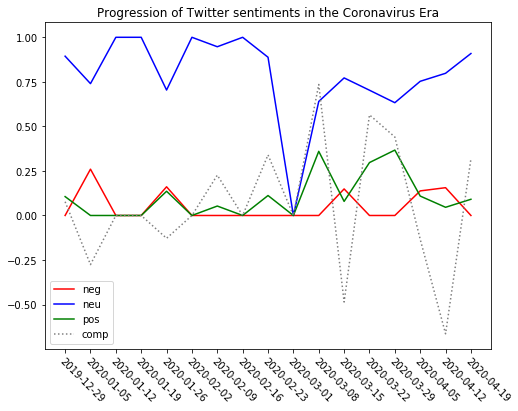

In [27]:
points = []
# for date, senti in baselineSentis.items():
#     print(date, senti)
fig, subs = plt.subplots(1, sharey = True, figsize=(8,6))
for date, senti in weeklySentis.items():
    points.append((date, senti))
        
    points = sorted(points, key=byDate)
    x, sentis = zip(*points)

yNeg = [senti["neg"] for senti in sentis]
yNeu = [senti["neu"] for senti in sentis]
yPos = [senti["pos"] for senti in sentis]
yComp = [senti["compound"] for senti in sentis]

subs.plot(x, yNeg, color='red', label="neg")
subs.plot(x, yNeu, color='blue', label="neu")
subs.plot(x, yPos, color='green', label="pos")
subs.plot(x, yComp, color='gray', label="comp", linestyle='dotted')

subs.legend()
plt.setp(subs.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
subs.set_title(f"Progression of Twitter sentiments in the Coronavirus Era")
plt.savefig("graphs/covidera_sentiments.jpg")
plt.show()

01.26_cleaned.txt


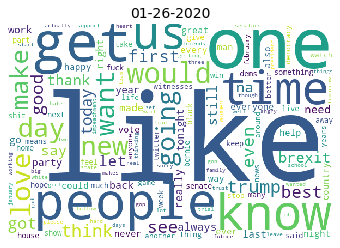

03.29_cleaned.txt


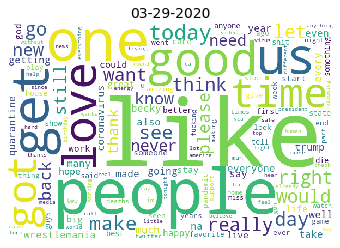

02.02_cleaned.txt


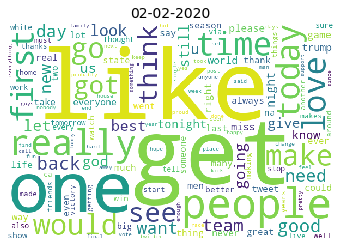

04.12_cleaned.txt


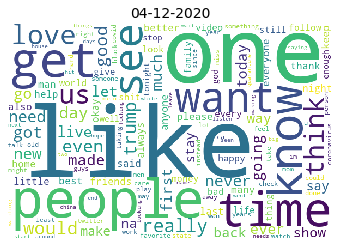

01.12_cleaned.txt


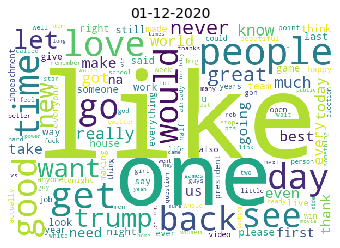

02.23_cleaned.txt


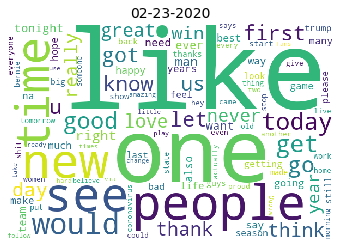

03.08_cleaned.txt


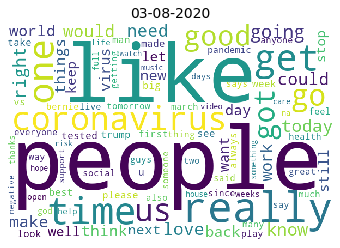

12.29_cleaned.txt


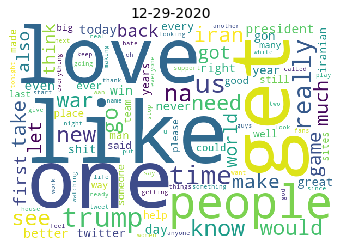

03.01_cleaned.txt


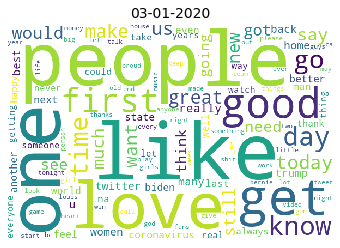

01.05_cleaned.txt


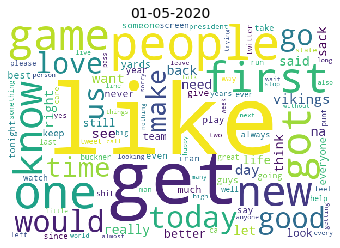

01.19_cleaned.txt


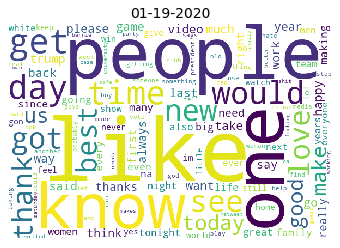

02.16_cleaned.txt


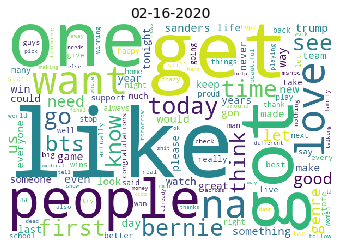

03.15_cleaned.txt


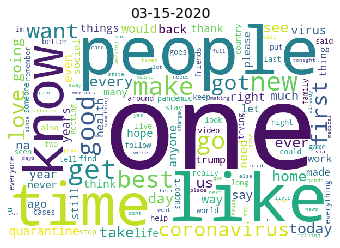

03.22_cleaned.txt


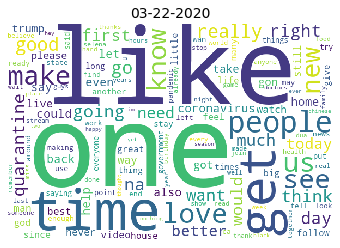

04.05_cleaned.txt


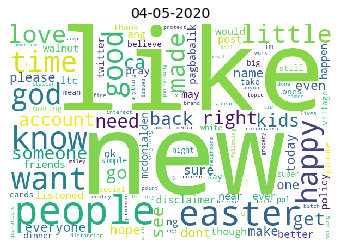

02.09_cleaned.txt


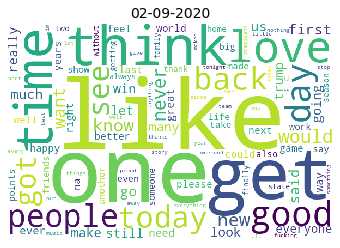

04.19_cleaned.txt


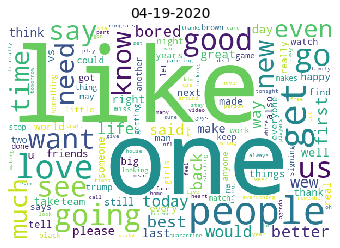

In [82]:
# Monthly word clouds for each keyword

for file in os.listdir("covidera_cleaned/"):
    print(file)
    with open(f"covidera_cleaned/{file}") as fp:
        text = fp.read()
    splitText = text.split()
    
    month, day = file.split("_")[0].split(".")
    year = 2020
    date = f"{month}-{day}-{year}" 

    splitText = [w.lower() for w in splitText]
    word_count = Counter(splitText)

    wc = WordCloud(width=600, height=400, collocations=False, max_words = 150, min_font_size = 10, background_color ='white',).generate_from_frequencies(word_count)
    plt.imshow(wc) 
    plt.axis("off") 
    plt.title(date,fontsize=14)
#     cloud = WordCloud(width = 500, height = 400, 
#                        
#                       min_font_size = 10, collocations=False).generate(p)
    plt.savefig("graphs/covidera_cloud_" + file.split("_")[0] +".jpg", bbox_inches="tight",dpi=300)
    plt.show()